# Convergence analysis for Newmark standing mode (wsol)
Load `convergence.csv`, inspect the data, and visualize L2/H1 errors vs time step and mesh size.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib.colors as colors

sns.set_theme(style="whitegrid")

In [ ]:
csv_path = Path('/home/ghi/Documents/HPC-PoliMi/NMPDE/labs/wave-equation/results/newmark-standing-mode-wsol/convergence.csv')
df_newmark = pd.read_csv(csv_path)
# Drop duplicates keeping the last entry
df_newmark = df_newmark.drop_duplicates(subset=['h', 'N_el_x', 'N_el_y', 'r', 'dt', 'T', 'method'], keep='last')
df_newmark.head()

FileNotFoundError: [Errno 2] No such file or directory: '/home/ghi/Documents/HPC-PoliMi/NMPDE/labs/wave-equation/results/newmark-standing-mode-wsol/convergence.csv'

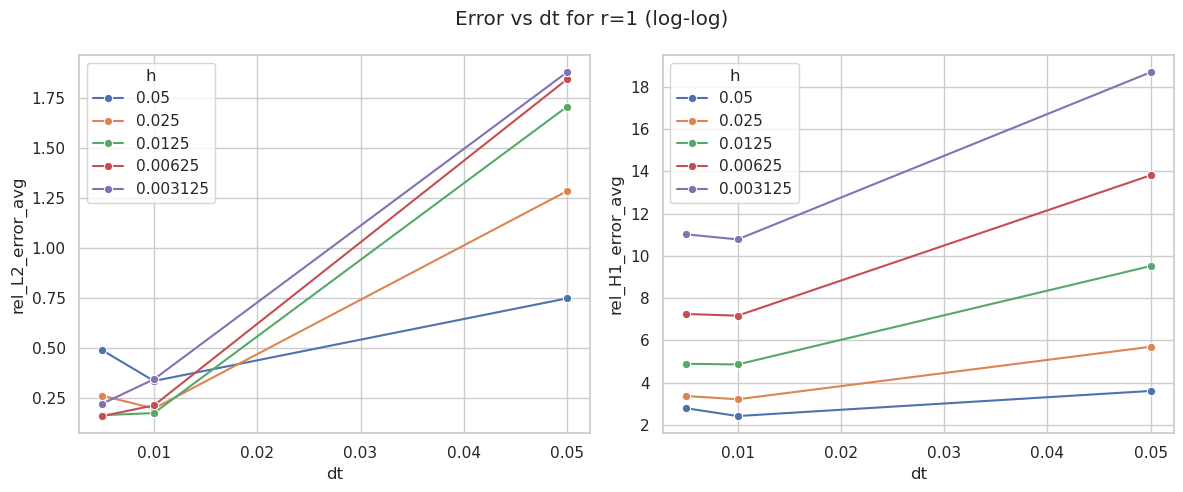

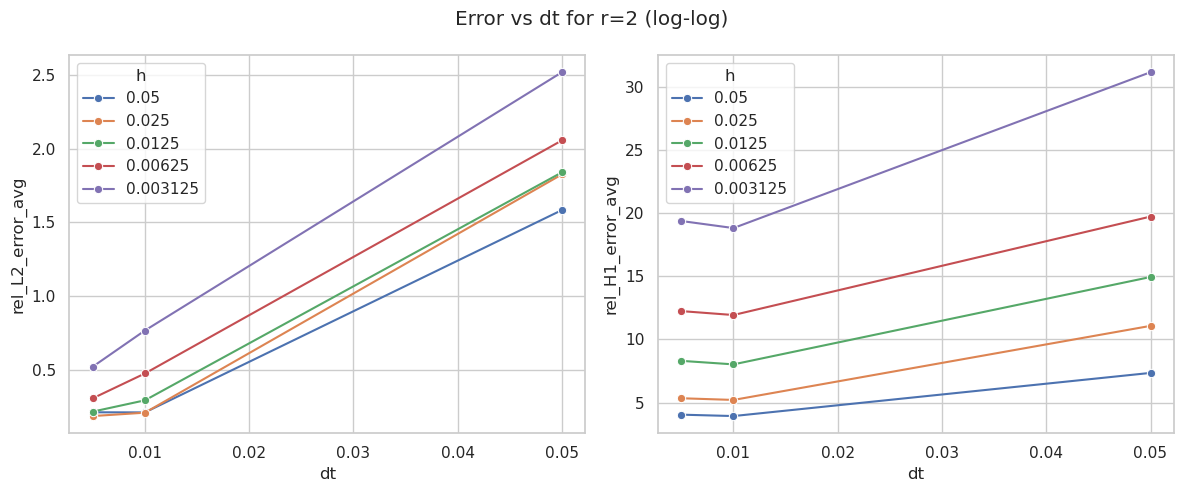

In [ ]:
# Errors vs dt separated by r using seaborn
figs = []
for r_val in sorted(df_newmark['r'].unique()):
    sub = df_newmark[df_newmark['r'] == r_val].copy()
    sub['h_label'] = sub['h'].astype(str)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
    sns.lineplot(data=sub, x='dt', y='rel_L2_error_avg', hue='h_label', marker='o', ax=axes[0])
    sns.lineplot(data=sub, x='dt', y='rel_H1_error_avg', hue='h_label', marker='o', ax=axes[1])
    for ax, ylabel in zip(axes, ['rel_L2_error_avg', 'rel_H1_error_avg']):
        ax.set_xscale('log'); ax.set_yscale('log')
        ax.set_xlabel('dt'); ax.set_ylabel(ylabel)
    axes[0].legend(title='h'); axes[1].legend(title='h')
    fig.suptitle(f'Error vs dt for r={r_val} (log-log)')
    plt.tight_layout()
    figs.append(fig)

In [ ]:
# Determine common limits for color scaling across both methods
l2_min = min(df_newmark['rel_L2_error_avg'].min(), df_newmark['rel_L2_error_avg'].min())
l2_max = max(df_newmark['rel_L2_error_avg'].max(), df_newmark['rel_L2_error_avg'].max())
h1_min = min(df_newmark['rel_H1_error_avg'].min(), df_newmark['rel_H1_error_avg'].min())
h1_max = max(df_newmark['rel_H1_error_avg'].max(), df_newmark['rel_H1_error_avg'].max())

for r_val in sorted(df_newmark['r'].unique()):
    sub = df_newmark[df_newmark['r'] == r_val].copy()
    pivot_l2 = sub.pivot_table(index='h', columns='dt', values='rel_L2_error_avg')
    pivot_h1 = sub.pivot_table(index='h', columns='dt', values='rel_H1_error_avg')
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=False, sharey=True)
    sns.heatmap(pivot_l2, ax=axes[0], cmap='magma', norm=colors.LogNorm(vmin=l2_min, vmax=l2_max), cbar_kws={'label': 'rel_L2_error_avg'})
    sns.heatmap(pivot_h1, ax=axes[1], cmap='magma', norm=colors.LogNorm(vmin=h1_min, vmax=h1_max), cbar_kws={'label': 'rel_H1_error_avg'})
    axes[0].set_title(f'L2 error (r={r_val})'); axes[1].set_title(f'H1 error (r={r_val})')
    axes[0].set_xlabel('dt'); axes[1].set_xlabel('dt'); axes[0].set_ylabel('h')
    plt.tight_layout()

# Convergence analysis for Theta standing mode (wsol)
Load `convergence.csv`, inspect the data, and visualize L2/H1 errors vs time step and mesh size.

In [23]:
csv_path_theta = Path('/home/ghi/Documents/HPC-PoliMi/NMPDE/labs/wave-equation/results/theta-standing-mode-wsol/convergence.csv')
df_theta = pd.read_csv(csv_path_theta)
# Drop duplicates keeping the last entry
df_theta = df_theta.drop_duplicates(subset=['h', 'N_el_x', 'N_el_y', 'r', 'dt', 'T', 'method'], keep='last')
df_theta.head()

,h,N_el_x,N_el_y,r,dt,T,method,rel_L2_error_avg,rel_H1_error_avg,elapsed_time_s
50,0.05,20,20,1,0.100,1,theta-standing-mode-wsol,0.248760,0.255341,0.046
51,0.05,20,20,1,0.050,1,theta-standing-mode-wsol,0.253753,0.260128,0.083
52,0.05,20,20,1,0.010,1,theta-standing-mode-wsol,0.060294,0.098093,0.360
53,0.05,20,20,1,0.005,1,theta-standing-mode-wsol,0.047628,0.096388,0.799
54,0.05,20,20,1,0.001,1,theta-standing-mode-wsol,0.021205,0.082718,3.934


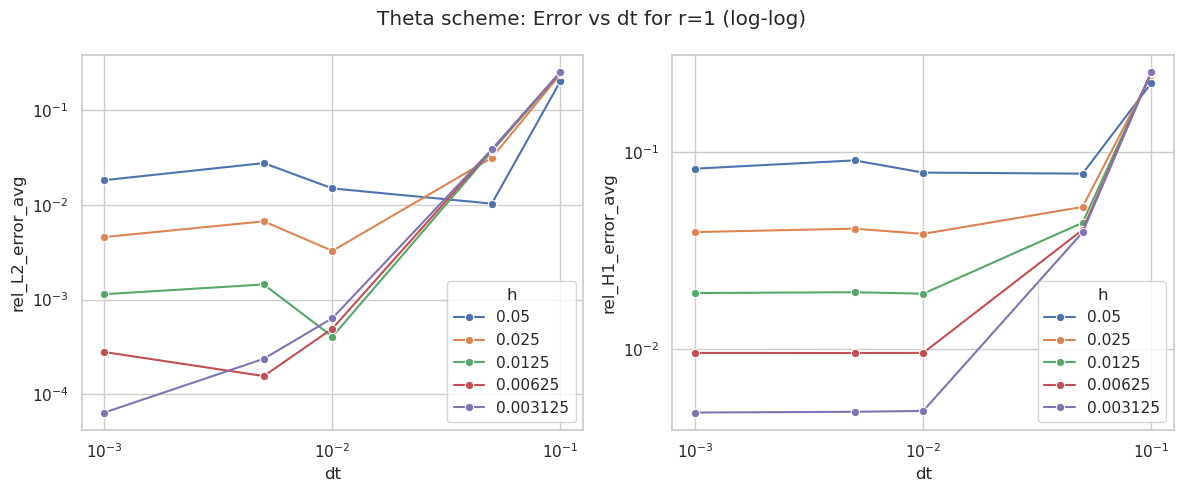

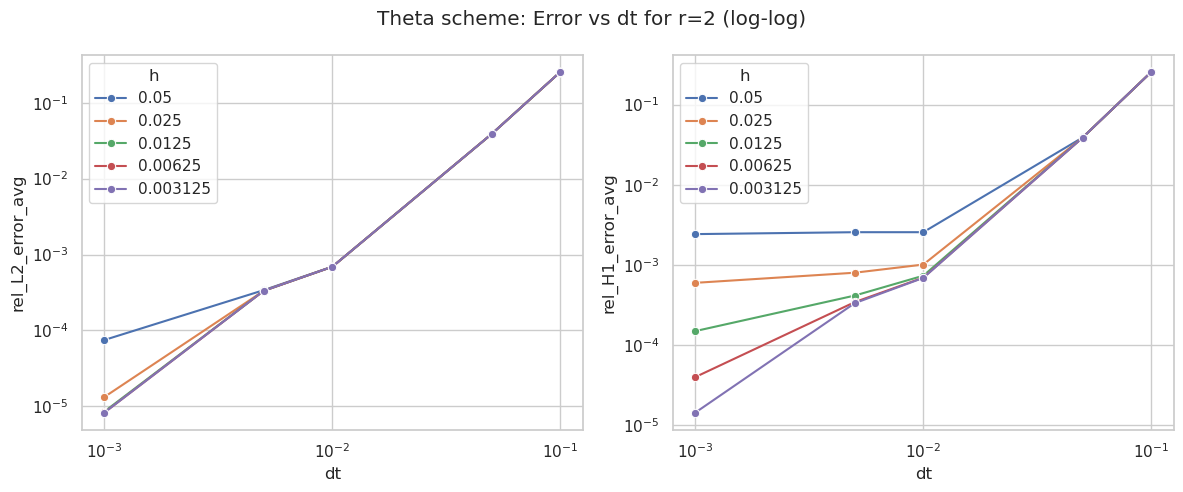

In [17]:
# Errors vs dt separated by r for theta scheme using seaborn
figs_theta = []
for r_val in sorted(df_theta['r'].unique()):
    sub = df_theta[df_theta['r'] == r_val].copy()
    sub['h_label'] = sub['h'].astype(str)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
    sns.lineplot(data=sub, x='dt', y='rel_L2_error_avg', hue='h_label', marker='o', ax=axes[0])
    sns.lineplot(data=sub, x='dt', y='rel_H1_error_avg', hue='h_label', marker='o', ax=axes[1])
    for ax, ylabel in zip(axes, ['rel_L2_error_avg', 'rel_H1_error_avg']):
        ax.set_xscale('log'); ax.set_yscale('log')
        ax.set_xlabel('dt'); ax.set_ylabel(ylabel)
    axes[0].legend(title='h'); axes[1].legend(title='h')
    fig.suptitle(f'Theta scheme: Error vs dt for r={r_val} (log-log)')
    plt.tight_layout()
    figs_theta.append(fig)

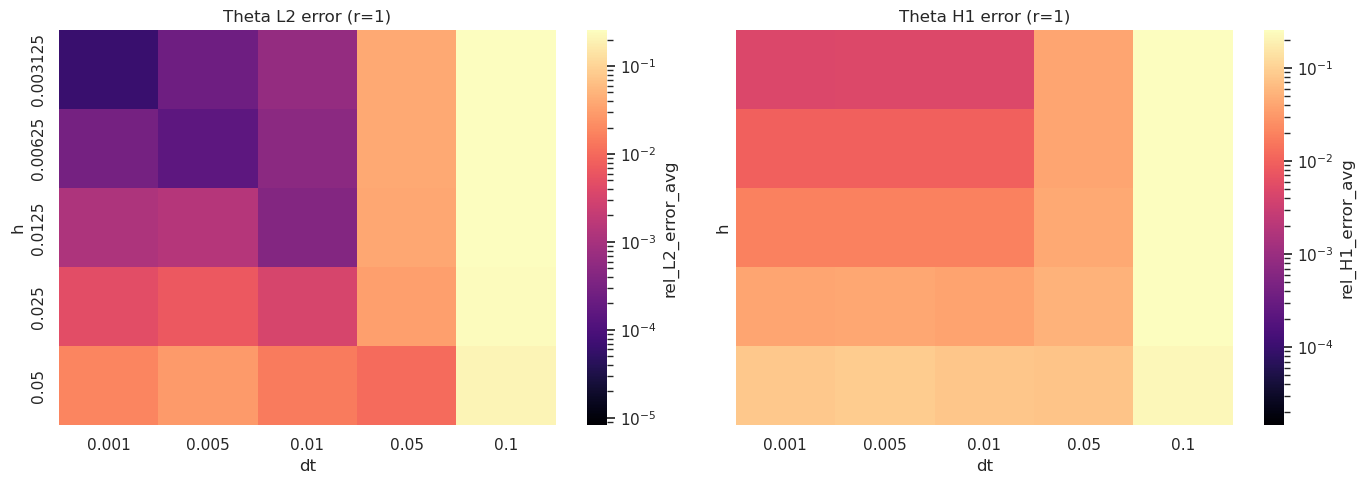

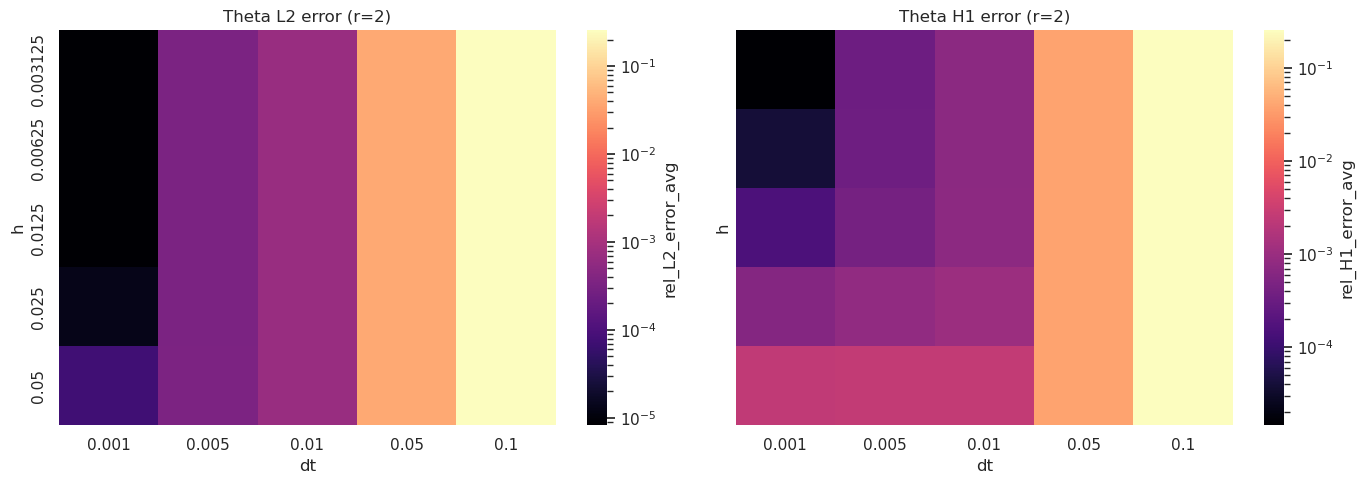

In [21]:
# Determine common limits for color scaling across both methods
l2_min = min(df_theta['rel_L2_error_avg'].min(), df_theta['rel_L2_error_avg'].min())
l2_max = max(df_theta['rel_L2_error_avg'].max(), df_theta['rel_L2_error_avg'].max())
h1_min = min(df_theta['rel_H1_error_avg'].min(), df_theta['rel_H1_error_avg'].min())
h1_max = max(df_theta['rel_H1_error_avg'].max(), df_theta['rel_H1_error_avg'].max())

for r_val in sorted(df_theta['r'].unique()):
    sub = df_theta[df_theta['r'] == r_val].copy()
    pivot_l2 = sub.pivot_table(index='h', columns='dt', values='rel_L2_error_avg')
    pivot_h1 = sub.pivot_table(index='h', columns='dt', values='rel_H1_error_avg')
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=False, sharey=True)
    sns.heatmap(pivot_l2, ax=axes[0], cmap='magma', norm=colors.LogNorm(vmin=l2_min, vmax=l2_max), cbar_kws={'label': 'rel_L2_error_avg'})
    sns.heatmap(pivot_h1, ax=axes[1], cmap='magma', norm=colors.LogNorm(vmin=h1_min, vmax=h1_max), cbar_kws={'label': 'rel_H1_error_avg'})
    axes[0].set_title(f'Theta L2 error (r={r_val})'); axes[1].set_title(f'Theta H1 error (r={r_val})')
    axes[0].set_xlabel('dt'); axes[1].set_xlabel('dt'); axes[0].set_ylabel('h')
    plt.tight_layout()